In [1]:
import pandas as pd
import numpy as np

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import statsmodels.api as sm

from patsy import dmatrices
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from semipar.KernReg.locpoly import locpoly

In [3]:
motorcycle = pd.read_stata("semipar/data/motorcycle.dta")

In [4]:
motorcycle.head()

,time,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7


In [5]:
# OLS
y, x = dmatrices('accel ~ time', data = motorcycle)
model_fit = sm.OLS(y, x)
OLSresults = model_fit.fit()

In [6]:
# polynomial of degree 3
motorcycle['time2'] = motorcycle['time']**2
motorcycle['time3'] = motorcycle['time']**3

y, x = dmatrices('accel ~ time + time2 + time3', data = motorcycle)
model_poly = sm.OLS(y, x)
OLSpolyresults = model_poly.fit()

In [7]:
# Local polynomials
n = len(motorcycle)
time = np.asarray(motorcycle["time"])
accel = np.asarray(motorcycle["accel"])

# large bandwidth
gridpoints_largebw, curvest_largebw = locpoly(time, accel, derivative=0, degree=1, bandwidth=100000, gridsize=n)

# small bandwidth --> fitting the noise
gridpoints_smallbw, curvest_smallbw = locpoly(time, accel, derivative=0, degree=100, bandwidth=0.65, gridsize=n)

# reasonable bandwidth
gridpoints, curvest = locpoly(time, accel, derivative=0, degree=3, bandwidth=3.3, gridsize=n)

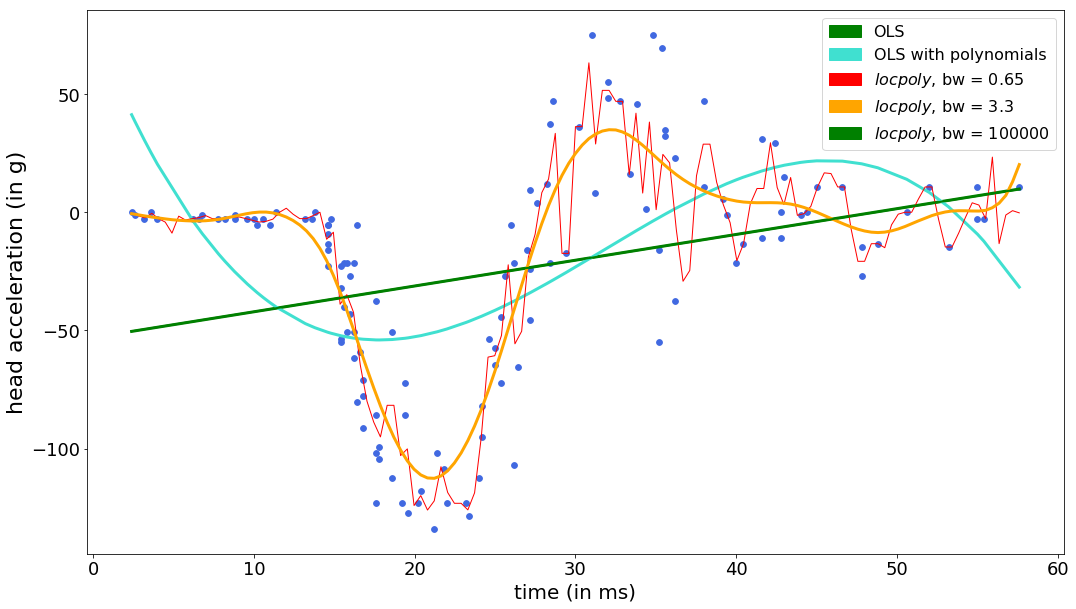

In [8]:
# Plot
ax = plt.figure(figsize=(17.5, 10)).add_subplot(111)

ax.set_ylabel("head acceleration (in g)", fontsize=22)
ax.set_xlabel("time (in ms)", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=18)

plt.scatter(motorcycle["time"], motorcycle["accel"], label="original data", color="royalblue", s=33)

# OLS results
ax.plot(time, OLSresults.fittedvalues, label="$OLS$",  color="green", linewidth=3)

# OLS with polynomials
ax.plot(time, OLSpolyresults.fittedvalues, label="OLS with polynomials",  color="turquoise", linewidth=3)

ax.plot(gridpoints_smallbw, curvest_smallbw, label="locpoly, bw = 0.65",  color="red", linewidth=1) 
ax.plot(gridpoints, curvest, label="$original MTE$",  color="orange", linewidth=3) 
ax.plot(gridpoints_largebw, curvest_largebw, label="locpoly, bw = 100000", color="green", linewidth=2) 

green_patch = mpatches.Patch(color="green", label="OLS")
turquoise_patch = mpatches.Patch(color="turquoise", label="OLS with polynomials")
red_patch = mpatches.Patch(color="red", label="$locpoly$, bw = 0.65")
orange_patch = mpatches.Patch(color="orange", label="$locpoly$, bw = 3.3")
lime_patch = mpatches.Patch(color="green", label="$locpoly$, bw = 100000")


plt.legend(handles=[green_patch, turquoise_patch, red_patch, orange_patch, lime_patch], prop={"size": 16})
plt.show()